<i><h1 align='center' style='color:#55a630'>Business Intelligence Visualizations with Python</h1></i>

<h2 style='color:#DDDF00'>1. Additional Plot Types</h2>

Even though these plot types are included in the second part of this series of *__Business Intelligence Visualizations with Python__*, they are not less important, as they complement the already-introduced plots. I believe you’ll find them even more interesting than basic plots!

To begin with this series, we must install required libraries:

<h3 style='color:#55a630'>Importing Required Libraries

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

<h2 style='color:#DDDF00'>A. Horizontal Bar Plots with error bars:</h2>

A **Bar plot** is a chart that presents data using rectangular bars with heights and lengths proportional to the values they represent. The basic command utilized for bar charts is *plt.bar(x_values, y_values).*

The additional feature involved in this plot are Error Bars, which are graphical representations of the variability of data. They’re commonly used to indicate the estimated error in a desired measure.

This time, we’ll be plotting a horizontal bar plot with the following input data:

In [2]:
# Input data for error bars and labels
mean_values = [1, 2, 3]
std_dev = [0.2, 0.3, 0.4]
bar_labels = ['Bar 1', 'Bar 2', 'Bar 3']
y_values = [0,1,2]

Now let’s plot the bars with the `plt.barh` command:

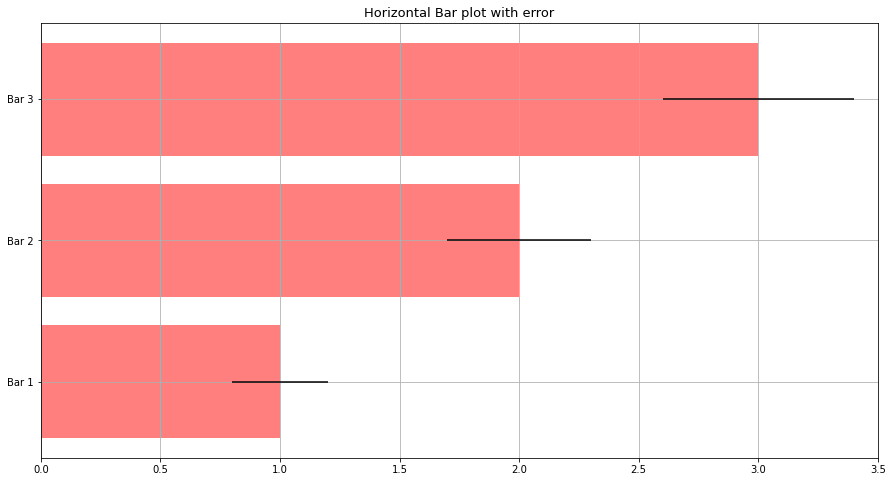

In [3]:
# Create bar plots
plt.figure(figsize=(15,8))
plt.yticks(y_values, bar_labels, fontsize=10)
plt.barh(y_values, mean_values, xerr=std_dev,align='center', alpha=0.5, color='red')# Labels and plotting
plt.title('Horizontal Bar plot with error', fontsize=13)
plt.xlim([0, 3.5])
plt.grid()
plt.savefig('Plots/plot_1.jpg')
plt.show()

A variation of this plot can be made with the insertion of labels or texts to the bars. We’ll do this with the following input data:

In [4]:
# Input data for error bars and labels
data = range(200, 225, 5)
bar_labels = ['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5']
y_values = [0,1,2,3,4]

Proceed with the plots preparation:

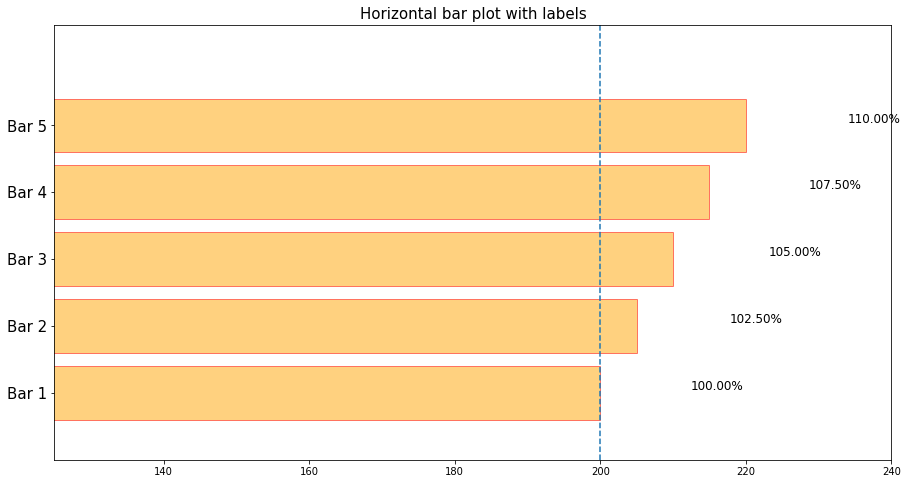

In [5]:
# Create bar plots
fig = plt.figure(figsize=(15,8))
plt.yticks(y_values, bar_labels, fontsize=15)
bars = plt.barh(y_values, data,align='center', alpha=0.5, color='orange', edgecolor='red')

# Labels and plotting

for b,d in zip(bars, data):
    plt.text(b.get_width() + b.get_width()*0.08, b.get_y() + b.get_height()/2,'{0:.2%}'.format(d/min(data)),ha='center', va='bottom', fontsize=12)
plt.title('Horizontal bar plot with labels', fontsize=15)
plt.ylim([-1,len(data)+0.5])
plt.xlim((125,240))
plt.vlines(min(data), -1, len(data)+0.5, linestyles='dashed')
plt.savefig('Plots/plot_2.jpg')
plt.show()

<h2 style='color:#DDDF00'>B. Back-to-back Bar Plots:</h2>

We continue with the family of bar plots, in this case with a variation that compares two sets of data horizontally. The commands to create this plot are the same as with the horizontal bar plot, but negating values for one of the sets of data.

In [6]:
# Input data for both sets of data utilizing numpy arrays to negate one set:
X1 = np.array([1, 2, 3])
X2 = np.array([3, 2, 1])
y_values = [0,1,2]
bar_labels = ['Bar 1', 'Bar 2', 'Bar 3']

Now let’s plot the bars with the `plt.barh` command and the negation feature:

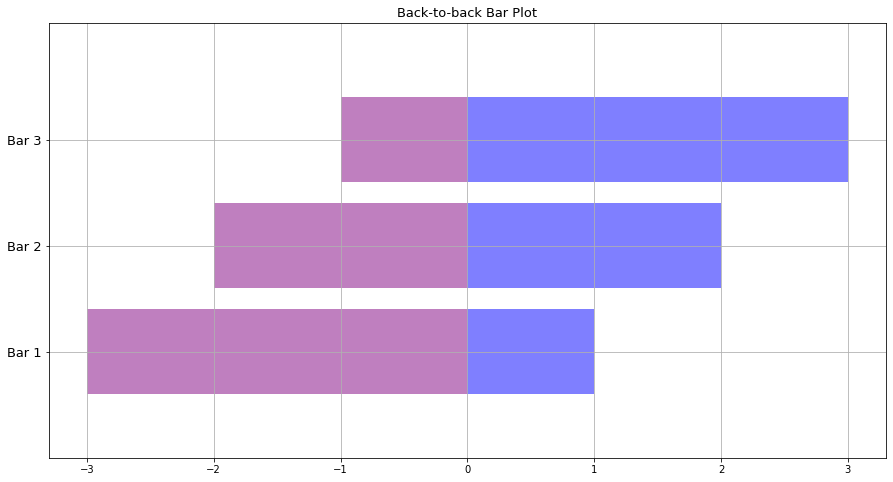

In [7]:
# Plot bars
fig = plt.figure(figsize=(15,8))
plt.yticks(y_values, bar_labels, fontsize=13)
plt.barh(y_values, X1,align='center', alpha=0.5, color='blue')
plt.barh(y_values, -X2,align='center', alpha=0.5, color='purple')
plt.title('Back-to-back Bar Plot', fontsize=13)
plt.ylim([-1,len(X1)+0.1])
plt.grid()
plt.savefig('Plots/plot_3.jpg')
plt.show()

<h2 style='color:#DDDF00'>C. Bar Plots with height labels:</h2>

This chart is equivalent to the previous shown, with the exception that it has vertical orientation and that I’ve added height labels to have a clearer visualization of such a metric. This can be done with the command **ax.text.**

In addition, I introduced the method **autofmt_xdate** included in Matplotlib to automate the rotation of labels. Take a look at the code*:*

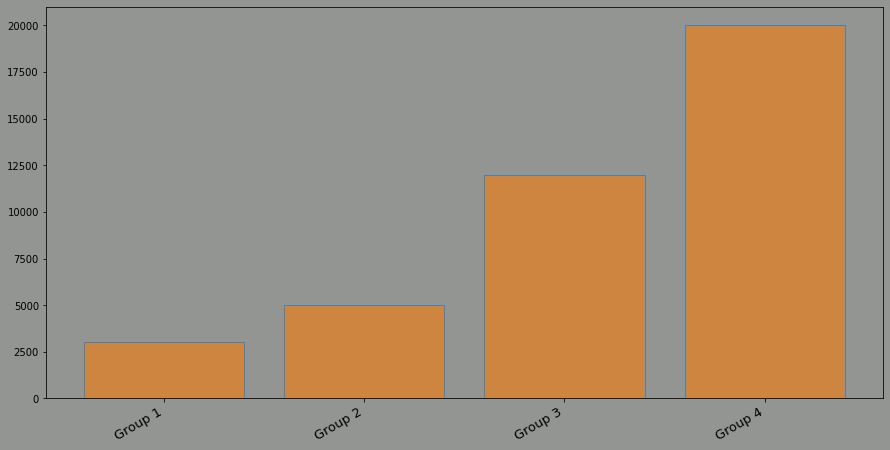

In [8]:
# Input information:
n_bars = [0,1,2,3]
values = [3000, 5000, 12000, 20000]
labels = ['Group 1', 'Group 2','Group 3', 'Group 4']

# Create figure and plots
fig, ax = plt.subplots(figsize=(15,8))
ax.set_facecolor('xkcd:gray')
fig.patch.set_facecolor('xkcd:gray')
fig.autofmt_xdate()
bars = plt.bar(n_bars, values, align='center', color='peru', edgecolor='steelblue')
plt.xticks(n_bars, labels, fontsize=13)

# Add text labels to the top of the bars

def rotate_label(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05 * height,'%d' % int(height),ha='center', va='bottom', fontsize=13)
    # Labels and plotting
    rotate_label(bars)
    plt.ylim([0, 25000])
    plt.title('Bar plot with Height Labels', fontsize=14)
    plt.tight_layout()
    
    plt.show()
    
    plt.savefig('Plots/plot_4.jpg')

<h2 style='color:#DDDF00'>D. Bar Plots with color gradients:</h2>

Let’s add some color to the equation. In the following chart, I introduce the built-in module called **[colormap](https://matplotlib.org/3.3.1/api/cm_api.html)**, which is utilized to implement intuitive color schemes for the plotted parameters. First, I’ll proceed with the imports:

In [9]:
import matplotlib.colors as col
import matplotlib.cm as cm

Now I’ll insert sample data to plot the chart. As you can see, **colormap** is implemented through the *ScalarMappable* class which applies data normalization before returning **RGBA** colors from the given colormap.

To clarify the previous statement, **RGBA** colors are a form of digital color representation, together with **HEX** and **HSL**. HEX is the most utilized and re-known, for being a simple representation of 6-digit numbers that can create *Red, Green,* and *Blue*. An example of a Hex color representation is **#123456**, 12 is Red, 34 is Green and 56 is Blue. On the other hand, **RGBA** colors add a new factor, the alpha, which is the *opacity or transparency* that follows the same percentage scheme: 0% represents absolute transparency and 100% represents absolute opacity which is the way we traditionally see colors. More details in [this](https://htmlcolors.com/rgba-color) website.

In this [link](https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html) to Matplotlib’s documentation you’ll find further details to the different colormaps that can be chosen. Take a look at the code to generate the plot in order to have a clearer view:

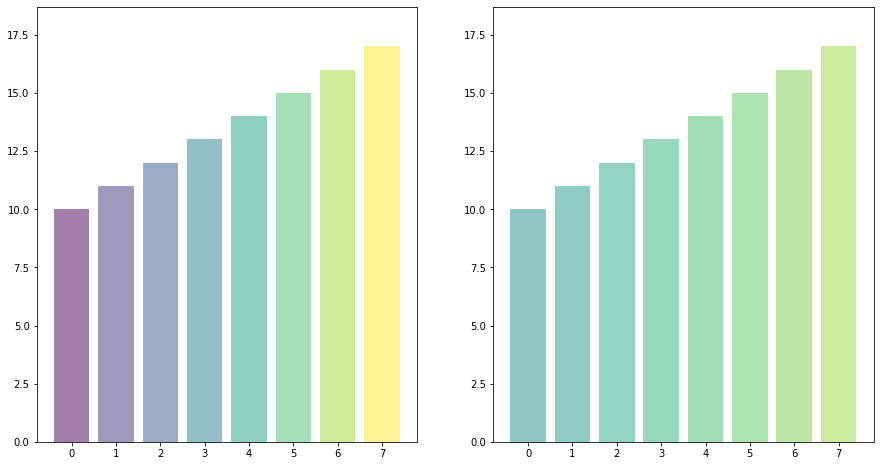

In [10]:
# Sample values
means = range(10,18)
x_values = range(0,8)

# Create Colormap
cmap1 = cm.ScalarMappable(col.Normalize(min(means), max(means), cm.spring))
cmap2 = cm.ScalarMappable(col.Normalize(0, 20, cm.spring))

# Plot bars
# Subplot 1
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(121)
plt.bar(x_values, means, align='center', alpha=0.5, color=cmap1.to_rgba(means))
plt.ylim(0, max(means) * 1.1)

# Subplot 2
plt.subplot(122)
plt.bar(x_values, means, align='center', alpha=0.5, color=cmap2.to_rgba(means))
plt.ylim(0, max(means) * 1.1)
plt.savefig('Plots/plot_5.jpg')
plt.show()



<h2 style='color:#DDDF00'>E. Bar Plots with pattern fill:</h2>

Now we’re going to add some styling to our data presentation using bar plots and pattern fills. This can be done utilizing the **set_hatch** command or including as an argument in the **plt.bar** configuration the **hatch** command.

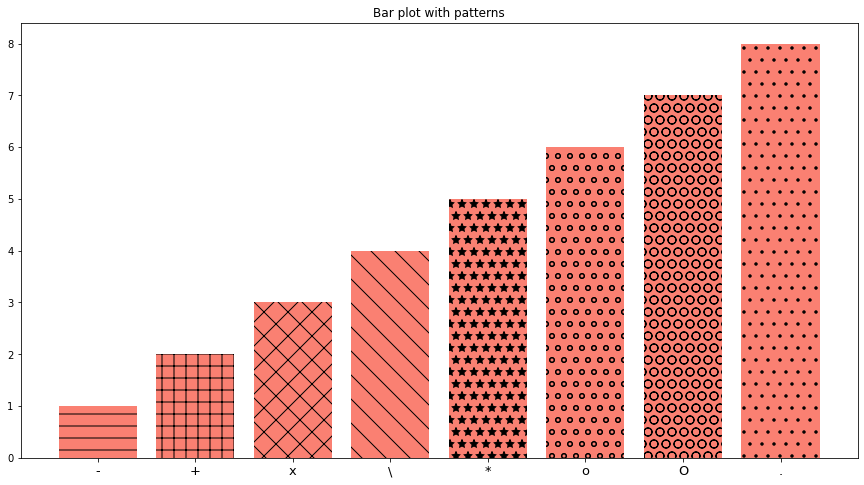

In [11]:
# Input data:
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
mean_values = range(1, len(patterns)+1)
y_values = [0,1,2,3,4,5,6,7]

# Create figure and bars
fig, ax = plt.subplots(figsize=(15,8))
bars = plt.bar(y_values,mean_values,align='center',color='salmon')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Labeling and plotting
plt.xticks(y_values, patterns, fontsize=13)
plt.title('Bar plot with patterns')
plt.savefig('Plots/plot_6.jpg')
plt.show()

<h2 style='color:#DDDF00'>F. Simple Heatmap:</h2>

A **Heatmap** is a graphical representation of data in which values are depicted by color. They make it easy to visualize complex data and understand it at a glance. The variation in color may be by [hue](https://en.wikipedia.org/wiki/Hue) or [intensity](https://en.wikipedia.org/wiki/Brightness), giving obvious visual cues to the reader about how the represented values are distributed.

In this case, the variation in color represents the number of observations clustered in a particular range of values, which is implemented with the *colorbar* feature of Matplotlib. Also, the plot is made with a 2-dimensional histogram, created with the command *plt.hist2d.*

In the code below, I create two normally-distributed variables X and Y with a mean of 0 and 5 respectively.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

#normal distribution center at x=0 and y=5
x = np.random.randn(100000)
y = np.random.randn(100000) + 5
print(y.mean())
print(x.mean())

5.005093241323296
0.0015767005081253399


When you plot the 2D hist, you see a 2D histogram. Think about it like looking at a histogram from the “top”. In addition to that, to have a clearer understanding of the color distribution, consider that colors centered at the 2D histogram are yellowish and correspond to the highest values of the colorbar, which is reasonable since X values should peak at 0 and Y values should peak at 5.

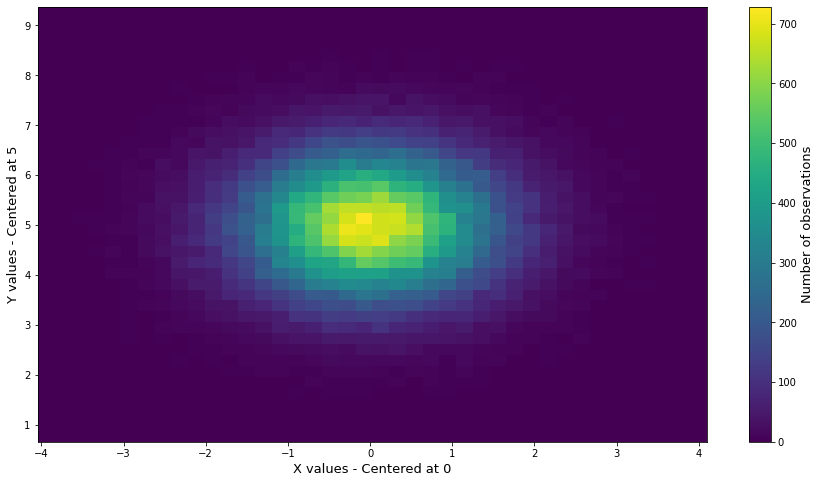

In [13]:
# Input a sample of normally distributed observations centered at x=0 and y=5
x = np.random.randn(100000)
y = np.random.randn(100000) + 5

# Create figure, 2D histogram and labels
plt.figure(figsize=(15,8))
plt.hist2d(x, y, bins=40)
plt.xlabel('X values - Centered at 0', fontsize=13)
plt.ylabel('Y values - Centered at 5', fontsize=13)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Number of observations', fontsize=13)
plt.savefig('Plots/plot_7.jpg')
plt.show()

<h2 style='color:#DDDF00'>G. Shadowed Pie chart:</h2>

Pie charts are used to display elements of a data set as proportions of a whole. In addition to the traditional **plt.pie** command, we’ll utilize the **shadow=True** boolean feature to bring some styling to the sliced of the pie chart.

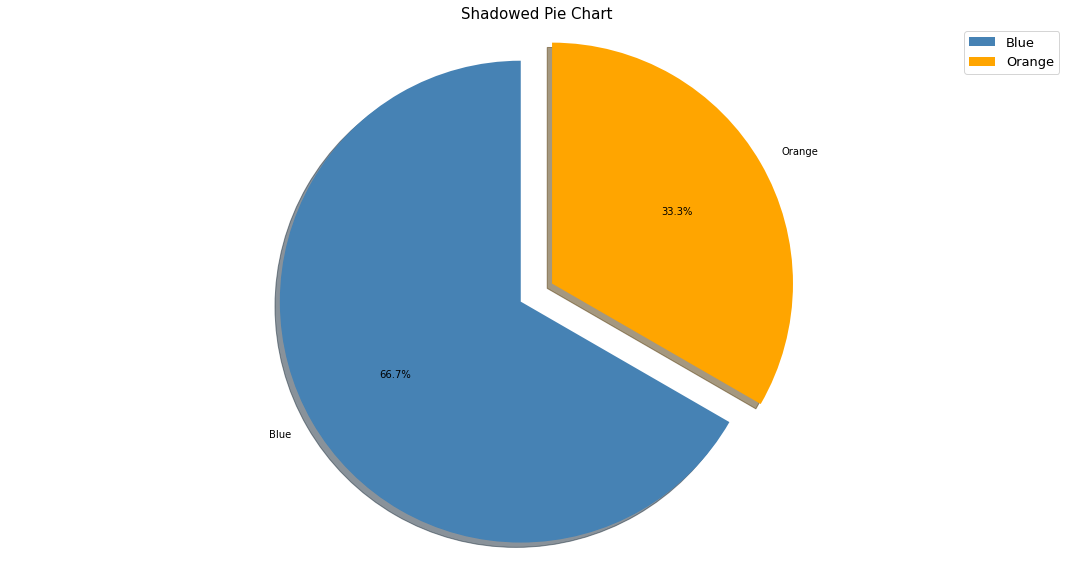

In [14]:
# Create figure and plot the chart:
plt.figure(figsize=(15,8))
plt.pie((10,5),labels=('Blue','Orange'),shadow=True,colors=('steelblue', 'orange'),
explode=(0,0.15),
startangle=90,
autopct='%1.1f%%'
)
plt.legend(fancybox=True, fontsize=13)
plt.axis('equal')
plt.title('Shadowed Pie Chart',fontsize=15)
plt.tight_layout()
plt.savefig('Plots/plot_8.jpg')
plt.show()

<h2 style='color:#DDDF00'>2. Formatting applications</h2>

Once visualizations are created and included in our analysis, it’s time to learn how to modify the format of our plots. We can implement all kinds of colors, line styles, gradients of color, or even markers.

<h2 style='color:#DDDF00'>A. Color Format Definition</h2>

Take a look at the following code, in which I implemented three different alternatives to display our desired color for a simple line plot, in this case being red.

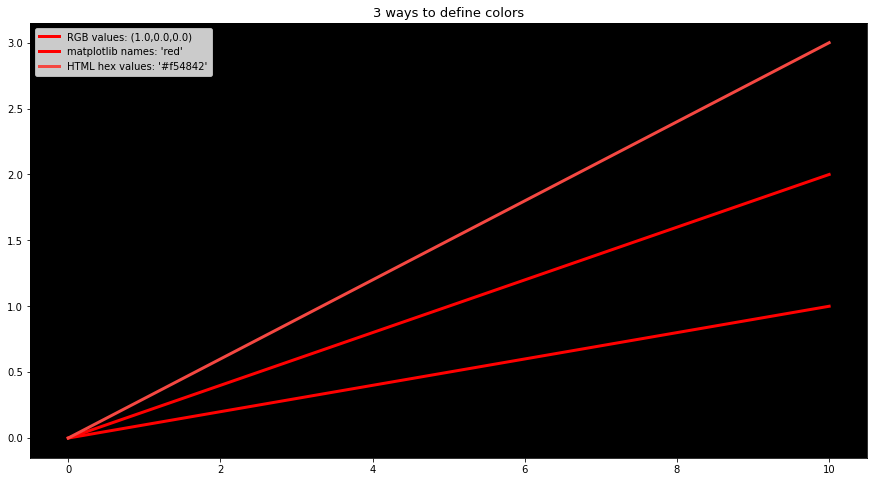

In [15]:
# Input sample data
sample_values = [1,2,3]

# Create figure, plots and labels
fig,ax = plt.subplots(figsize=(15,8))
ax.set_facecolor((0.,0.,0.))
plt.plot([0,10], [0,1], lw=3, color=(1.0,0.0,0.0))
plt.plot([0,10], [0,2], lw=3, color='red')
plt.plot([0,10], [0,3], lw=3, color='#f54842')
plt.legend(['RGB values: (1.0,0.0,0.0)',"matplotlib names: 'red'","HTML hex values: '#f54842'"],loc='upper left')
plt.title('3 ways to define colors', fontsize=13)
plt.savefig('Plots/plot_9.jpg')
plt.show()

<h2 style='color:#DDDF00'>B. Available colors in Matplotlib</h2>

On the other hand, we can display a sample of Matplotlib available colors utilizing the already mentioned **RGBA format**, such as the following commands:

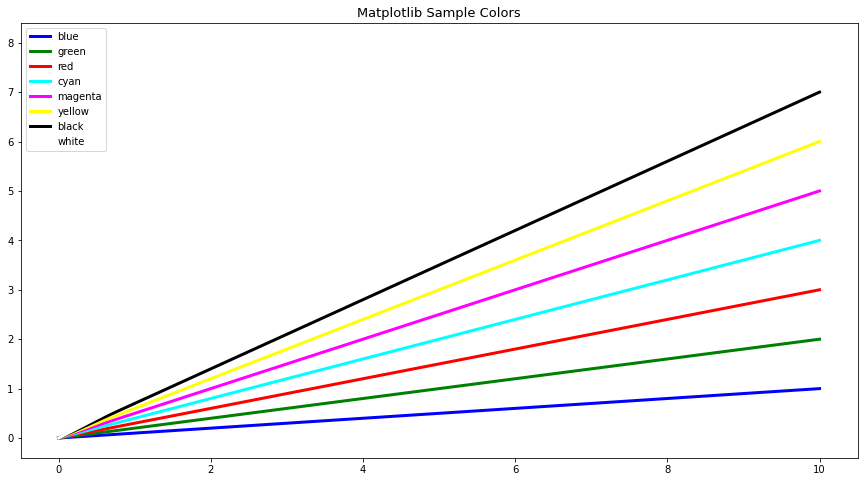

In [16]:
# Sample colors
colors = ['blue', 'green', 'red', 'cyan',  'magenta', 'yellow', 'black', 'white']
numbers = [1,2,3,4,5,6,7,8]

# Create figure, plots and labels
plt.figure(figsize=(15,8))
for n, col in zip(numbers, colors):
    plt.plot([0, 10], [0, n], label=col, lw=3, color=col)

plt.legend(loc='upper left')
plt.title('Matplotlib Sample Colors', fontsize=13)
plt.savefig('Plots/plot_10.jpg')
plt.show()

<h2 style='color:#DDDF00'>C. Gradient colors</h2>

Also, we can perform our own line plots with a sample of gradient colors applying the RGBA formatting:

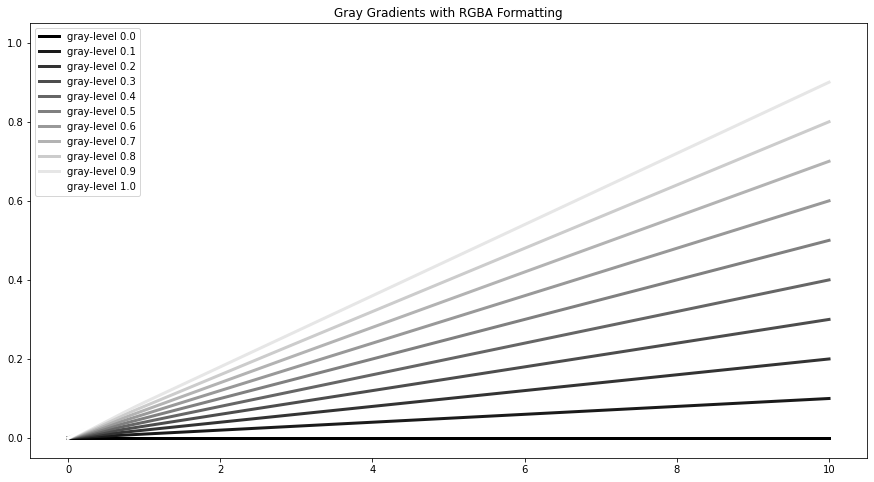

In [17]:
# Input data
gradients = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create figure, plots and labels
plt.figure(figsize=(15,8))
for i in gradients:
    plt.plot([0, 10], [0, i], label='gray-level %s'%i, lw=3,    color=str(i)) # ! gray level has to be parsed as string
plt.legend(loc='upper left')
plt.title('Gray Gradients with RGBA Formatting')
plt.savefig('Plots/plot_11.jpg')
plt.show()

<h2 style='color:#DDDF00'>D. Marker Styling</h2>

**Marker styling** is another interesting feature of Matplotlib’s package of tools available to nicely format our visualizations:

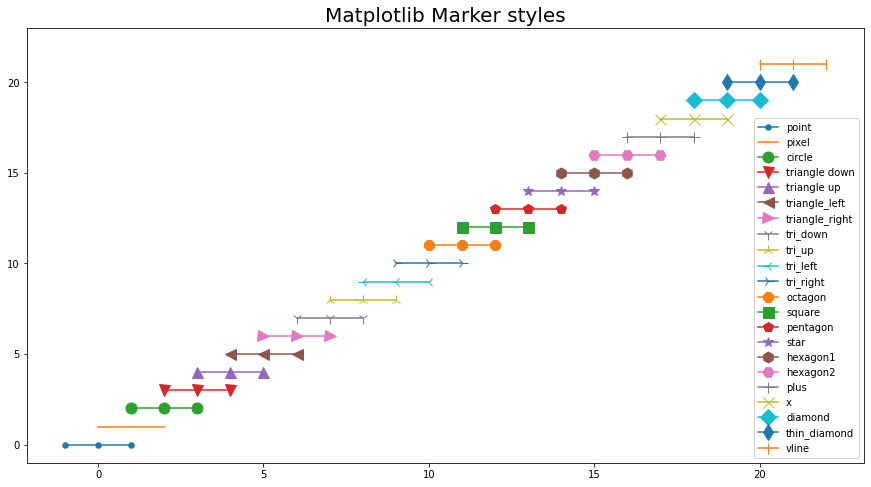

In [18]:
# Markers
marker_name = ['point', 'pixel', 'circle', 'triangle down', 'triangle up', 'triangle_left', 'triangle_right','tri_down', 'tri_up', 'tri_left', 'tri_right', 'octagon', 'square', 'pentagon', 'star', 'hexagon1','hexagon2', 'plus', 'x', 'diamond', 'thin_diamond', 'vline']
markers = ['.', ',', 'o', 'v', '^', '<', '>','1', '2', '3','4', '8', 's','p', '*','h', 'H','+','x','D','d', '|']

samples = range(len(markers))

# Create figure, plots and labels
plt.figure(figsize=(15, 8))
for i in samples:
    plt.plot([i-1, i, i+1], [i, i, i], label=marker_name[i], marker=markers[i], markersize=11)
plt.title('Matplotlib Marker styles', fontsize=20)
plt.ylim([-1, len(markers)+1])
plt.legend(loc='lower right')
plt.savefig('Plots/plot_12.jpg')
plt.show()

<h2 style='color:#DDDF00'>E. Style Sheet Selection</h2>

Matplotlib’s style package adds support for easy-to-switch plotting style sheets which are pre-defined, such as **ggplot**, the emulation of the popular plotting package in R. Here’s a list of all available styles:

In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


There are two ways to set the style sheet, the first is by setting it globally to our coding environment via **plt.style.use** function.

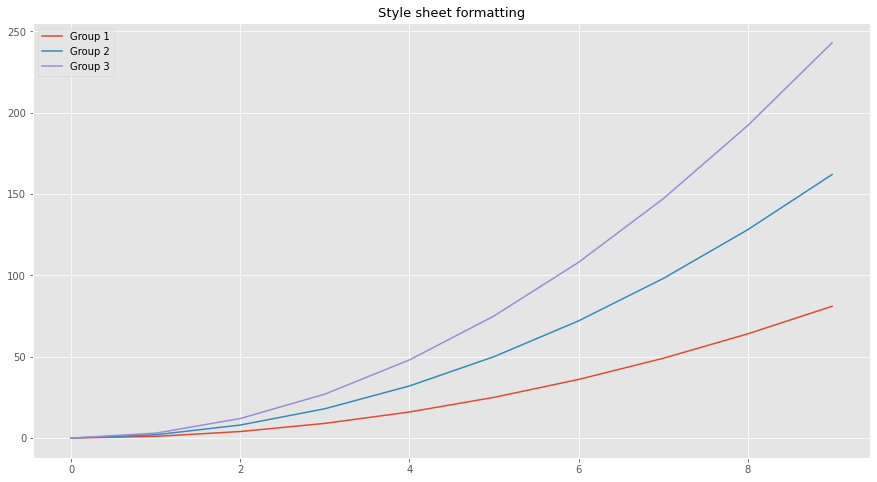

In [20]:
#Setting style globally
plt.style.use('ggplot')

# Data input
x = np.arange(10)

# Create figure, plots and labels
plt.figure(figsize=(15,8))
for i in range(1, 4):
    plt.plot(x, i * x**2, label='Group %d' % i)
plt.legend(loc='best')
plt.title('Style sheet formatting', fontsize=13)
plt.savefig('Plots/plot_13.jpg')
plt.show()

The second way is through the context manager, which applies the styling only to a specific code block:

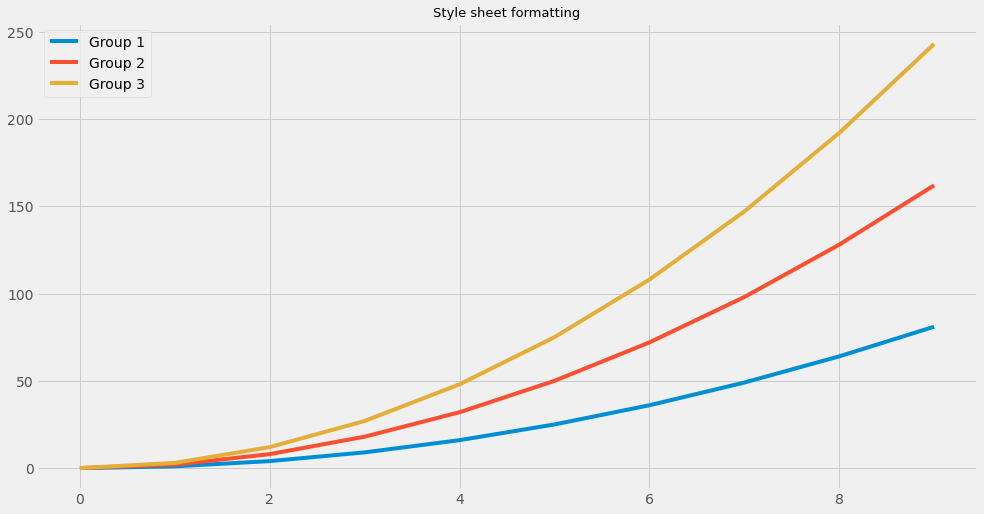

In [21]:
#Data input
x = np.arange(10)

# Create figure, plots and labels with the context manager
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(15,8))
    for i in range(1, 4):
         plt.plot(x, i * x**2, label='Group %d' % i)
    plt.legend(loc='best')
    plt.title('Style sheet formatting', fontsize=13)
    plt.savefig('Plots/plot_14.jpg')
    plt.show()